In [1]:
include("../init-notebook.jl")

(section-diffusion-absstab)=
# Absolute stability

```{index} stability; of IVP solvers
```

In {numref}`section-diffusion-methodlines` we applied several different time stepping methods to a linear, constant coefficient problem in the form 

$$
\mathbf{u}'(t)=\mathbf{A}\mathbf{u}(t).
$$

All of these methods are zero-stable in the sense of {numref}`section-ivp-zerostability`, in the limit as the time step size $\tau \to 0$.[^h2tau] Yet for some experiments with *fixed* $\tau$, as in {numref}`Demo {number} <demo-methodlines-heatFE>`, we have observed exponential growth in the different limit $n\to \infty$.

[^h2tau]: In Chapter 6 we used $h$ rather than $\tau$ to denote the time step size, but now we  reserve $h$ for spacing in the $x$ direction.

```{index} eigenvalue decomposition
```
Observe that if $\mathbf{A}$ has the eigenvalue decomposition $\mathbf{A}=\mathbf{V}\mathbf{D}\mathbf{V}^{-1}$, then

\begin{align*}
  \mathbf{u}'&=(\mathbf{V}\mathbf{D}\mathbf{V}^{-1})\mathbf{u}\\
  (\mathbf{V}^{-1} \mathbf{u}') &= \mathbf{D} (\mathbf{V}^{-1} \mathbf{u}) \\
  \mathbf{y}' &= \mathbf{D} \mathbf{y},
\end{align*}

where $\mathbf{y}(t)=\mathbf{V}^{-1}\mathbf{u}(t)$. Because $\mathbf{D}$ is diagonal, the dynamics of the components of $\mathbf{y}$ are completely decoupled: each row is a self-contained equation of the form $y_j'=\lambda_j y_j$, where $\lambda_j$ is an eigenvalue of $\mathbf{A}$. 

The diagonalization argument suggests that we can look at the scalar problems 

:::{math}
:label: absstabmodel
y' = \lambda y, \quad y(0)=1,
:::

arising from the eigenvalues. Keep in mind that these eigenvalues may not be real numbers.[^inotinteger] If we write $\lambda$ in real and imaginary parts as $\lambda=\alpha + i\beta$, then by Euler's identity, the exact solution of {eq}`absstabmodel` has magnitude

$$
   \bigl |e^{(\alpha+i\beta)t} \bigr| = \bigl |e^{\alpha t} \bigr| \cdot \bigl |e^{i \beta t} \bigr| = e^{\alpha t}.
$$

::::{proof:observation}
Solutions of {eq}`absstabmodel` are bounded as $t\to\infty$ if and only if $\alpha = \operatorname{Re} \lambda \le 0$. 
::::

[^inotinteger]: In this section, $i$ is the imaginary unit, not an integer index.

We now consider the counterpart of this observation for the solution produced by a numerical IVP solver.


```{index} ! absolute stability
```

(definition-absstab-model)=
::::{proof:definition} Absolute stability
Let $\lambda$ be a complex number, and let $y_0,y_1,y_2,\ldots,y_n$ be the numerical solution at times $0,\tau,2\tau,\ldots,n\tau$ of {eq}`absstabmodel` using a Runge–Kutta or multistep method with fixed stepsize $\tau$. Then the method is said to be **absolutely stable** at $\zeta = \tau\lambda$ if $|y_n|$ is bounded above as $n\to\infty$. 
::::

The fact that absolute stability depends only on the product $\zeta = \tau\lambda$, and not independently on the individual factors, is a result of how the IVP solvers are defined, as we will see below. Dimensionally, $\lambda$ has units of inverse time according to {eq}`absstabmodel`, so $\zeta$ is dimensionless.
## Stability regions

Each numerical IVP solver has its own collection of $\zeta$ values for which it is absolutely stable.

```{index} ! stability region
```

::::{proof:definition} Stability region
The **stability region** of an IVP solver is the collection of all $\zeta\in\complex$ for which the method is absolutely stable.
::::

(example-absstab-euler)=
::::{proof:example}
Consider an Euler discretization of $y'=\lambda y$:
  
$$
  y_{k+1} = y_k + \tau( \lambda y_k) =   (1+ \zeta ) y_k.
$$

Given that $y_0=1$ by {eq}`absstabmodel`, we easily deduce that $y_k = (1+\zeta)^k$ for all $k$, and therefore

$$
|y_k| = |1+\zeta|^k.
$$

Hence $|y_k|$ remains bounded above as $k\to \infty$ if and only if $|1+\zeta| \le 1$. Because $\zeta$ is a complex number, it's easiest to interpret this condition geometrically:

$$
  |\zeta + 1 | = |\zeta - (-1) | \le 1.
$$

That is, the distance in the plane from $\zeta$ to the point $-1$ is less than or equal to one. This description defines a closed disk of radius 1 centered at $(-1,0)$.
::::

(example-absstab-AM1)=
::::{proof:example}
The backward Euler method discretizes {eq}`absstabmodel` as

$$
y_{k+1} = y_k + \tau( \lambda y_{k+1}) \quad \Rightarrow \quad y_{k+1} =  \frac{1}{1-\zeta} y_k.
$$

Therefore, $y_k=(1-\zeta)^{-k}$ for all $k$, and absolute stability requires $|1-\zeta|^{-1} \le 1$, or 

$$
|\zeta-1|\ge 1.
$$

This inequality describes the region *outside* of the open disk of radius 1 centered at $1$ on the real axis of the complex plane.
::::

(example-absstab-IE2)=
::::{proof:example} 
The improved Euler method IE2 defined in {eq}`IE` discretizes {eq}`absstabmodel` as 

```{math}
{y}_{i+1} = y_i +  \zeta \left( y_i + \tfrac{1}{2}\zeta y_i \right) = (1 + \zeta + \tfrac{1}{2}\zeta^2) y_i.
```

The stability region consists of all $\zeta$ such that $| 1 + \zeta + \tfrac{1}{2}\zeta^2 | \le 1$. Although it is not elementary to describe this region geometrically, its boundary points satisfy

$$
1 - e{i\theta} + \zeta + \tfrac{1}{2}\zeta^2 = 0
$$

for some real $\theta$, and thus we can use the quadratic formula to find all the boundary points. 
::::

Stability regions for the most common IVP integrators are given in {numref}`figure-stabreg_ab_am` and {numref}`figure-stabreg_bd_rk`.  Note that the implicit Adams-Moulton methods are larger than those for the explicit Adams-Bashforth methods of the same order.  For the implicit backward differentiation methods, the exteriors of the curves provide large regions of stability, but significant portions of the imaginary axis may be excluded.  Finally, while the single-step Runge-Kutta methods have smaller regions of stability, those of orders 3 and 4 do include significant portions of the imaginary axis.

```{figure} figures/stabreg_ab_am.svg
:name: figure-stabreg_ab_am
Stability regions for Adams–Bashforth methods of order 1–4 (left) and Adams–Moulton methods of order 2–5 (right). The plots are in the complex $\zeta$-plane.
```

```{figure} figures/stabreg_bd_rk.svg
:name: figure-stabreg_bd_rk
Stability regions for backward differentiation methods of order 1–4 (left, exteriors of curves) and Runge–Kutta methods of order 1–4 (right). The plots are in the complex $\zeta$-plane.
```

For any particular method and value of $\lambda$ in {eq}`absstabmodel`, we can use the stability region to deduce which, if any, values of the time step $\tau$ will give bounded solutions. Both the magnitude and the argument (angle) of $\lambda$ play a role in determining such constraints.

(example-absstab-FEBE)=
::::{proof:example}
Suppose $\lambda=-4$ and Euler's method is applied. Since the time step is always positive, $\zeta=-4\tau$ is always on the negative real axis. The only part of that line that lies within the stability region of Euler as derived in {numref}`Example {number} <example-absstab-euler>` is the real interval $[-2,0]$. Hence we require $\zeta\ge -2$, or $\tau \le 1/2$. By contrast, the stability region of backward Euler includes the entire negative real axis, so absolute stability is unconditional, i. e., assured regardless of $\tau$.

Now suppose instead that $\lambda=i$, so that $\zeta=i\tau$. Clearly $\zeta$ is always on the positive imaginary axis. But no part of this axis, aside from the origin, lies in the stability region of Euler's method, so it is unconditionally *unstable* in this circumstance. The conclusion for backward Euler is the opposite; any value of $\tau$ will do, because the entire imaginary axis is within the stability region.
::::

{numref}`Example %s <example-absstab-FEBE>` does not contradict our earlier statements about the zero stability and convergence of Euler's method in general, even for the case $\lambda=i$. But those statements are based on the limit $\tau\to 0$ for $t$ in a finite interval $[a,b]$. Both this limit and the limit $t\to \infty$ imply the number of steps $n$ goes to infinity, but the limits behave differently.

The fact that implicit methods have larger stability regions than their explicit counterparts is the primary justification for using them. While they have larger work requirements per step, they sometimes can take steps that are orders of magnitude larger than explicit methods and still remain stable.

When adaptive time stepping methods are used, as in most software for IVPs, the automatically determined time step is chosen to satisfy absolute stability requirements (otherwise errors grow exponentially). This phenomenon was manifested in {numref}`Demo %s <demo-methodlines-auto>`: in the explicit IVP method `rk23`, error control forced tiny step sizes compared to those used by `Rodas4P`, which is based on implicit methods.

## Heat equation

```{index} heat equation, method of lines
```

Now we return to the semidiscretization {eq}`heatMOL` of the heat equation, which was solved by Euler in {numref}`Demo %s <demo-methodlines-heatFE>` and backward Euler in {numref}`Demo {number} <demo-methodlines-heatBE>`.

(demo-absstab-regions)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Both time stepping methods solved $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

In [2]:
m = 40;  _,_,Dₓₓ = FNC.diffper(m,[0,1]);

The eigenvalues of this matrix are real and negative:

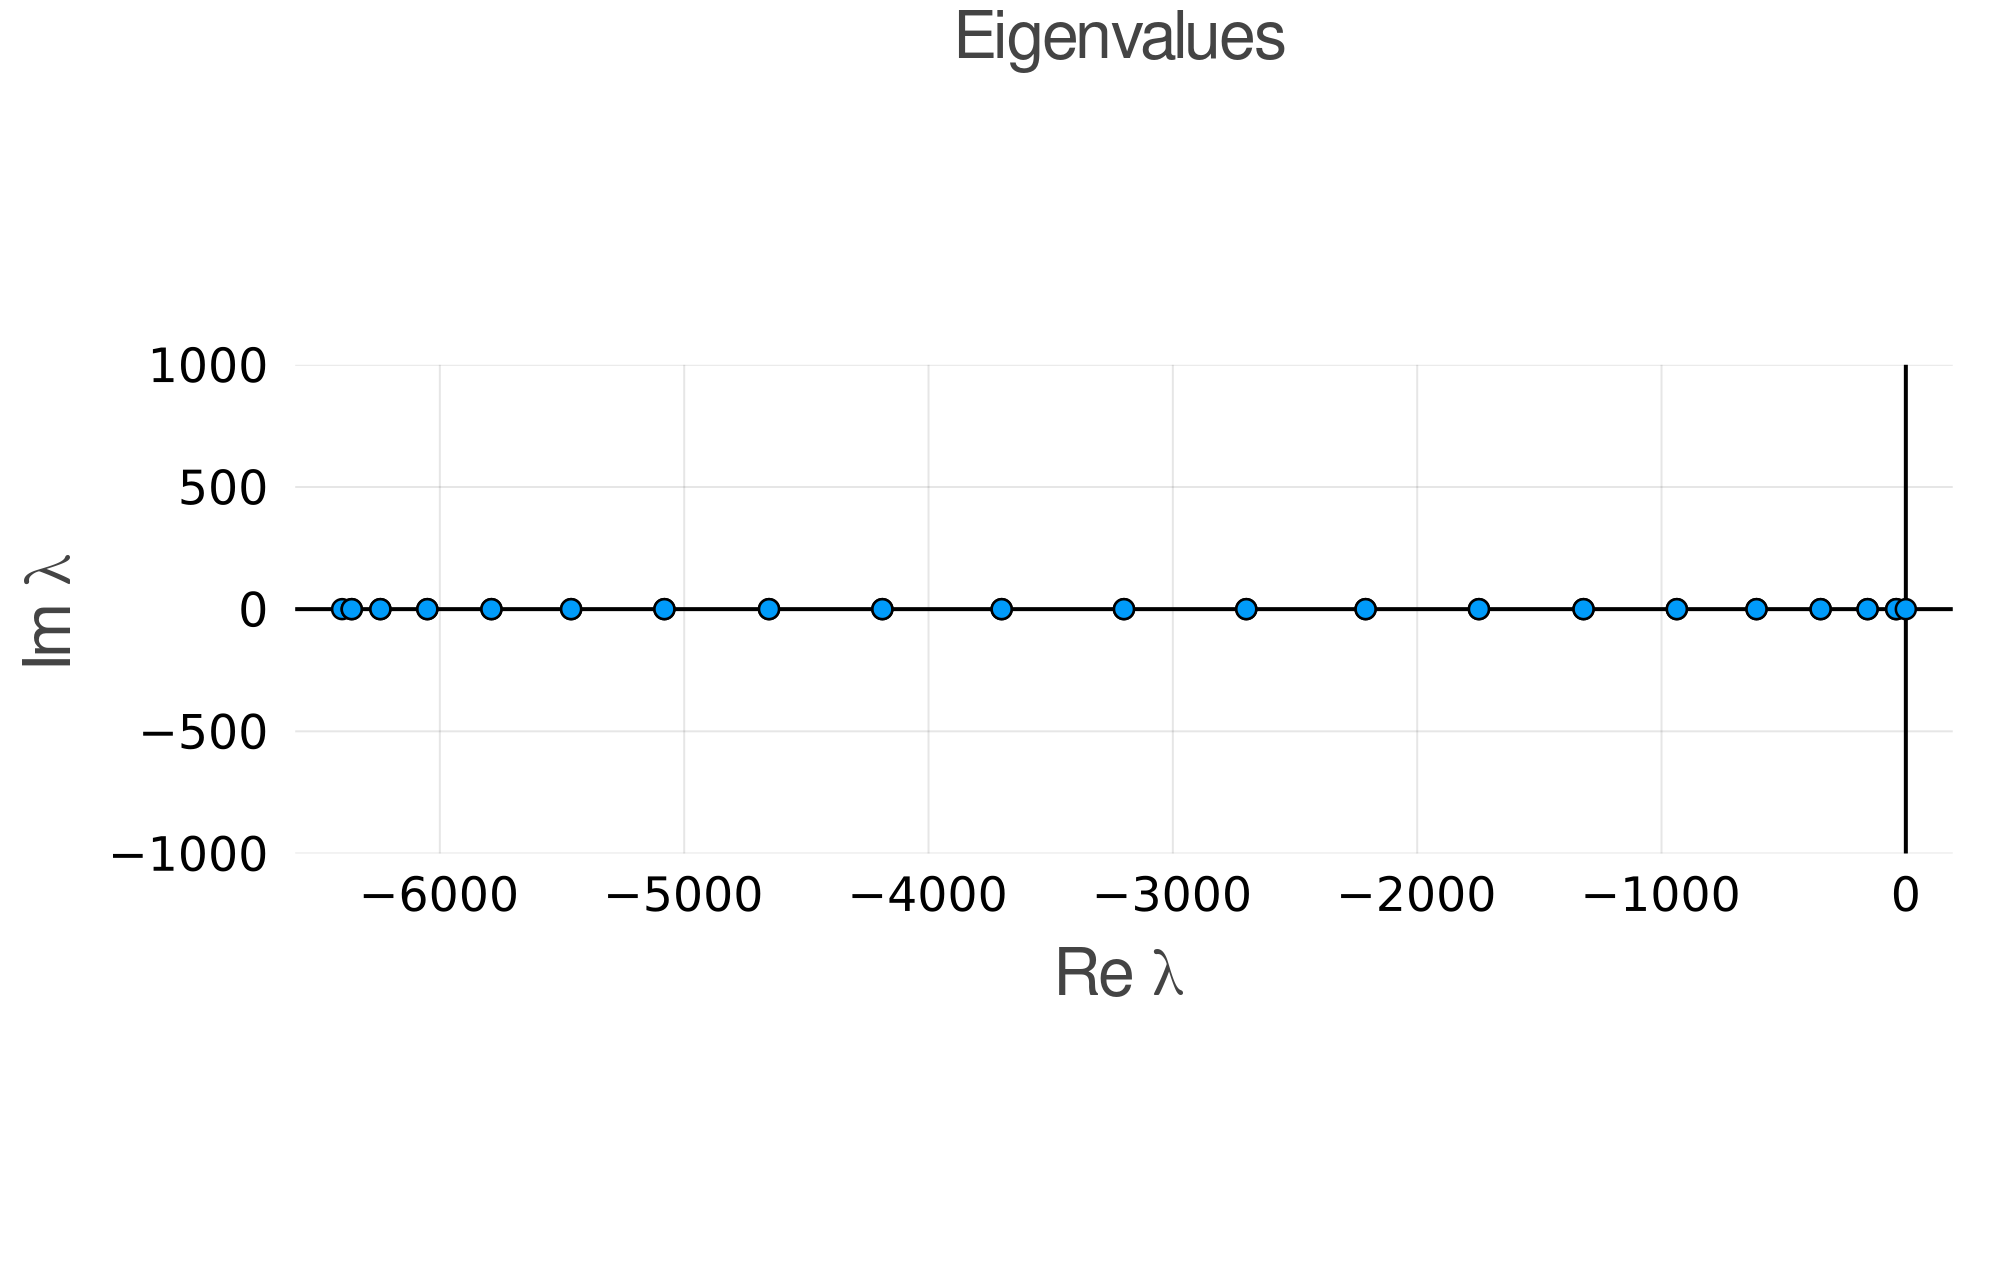

In [3]:
λ = eigvals(Dₓₓ)
scatter(real(λ),imag(λ),
    xaxis=("Re λ"),  yaxis=("Im λ",(-1000,1000)), aspect_ratio=1,
    title="Eigenvalues",frame=:zerolines)

The Euler method is absolutely stable in the region $|\zeta+1| \le 1$ in the complex plane:

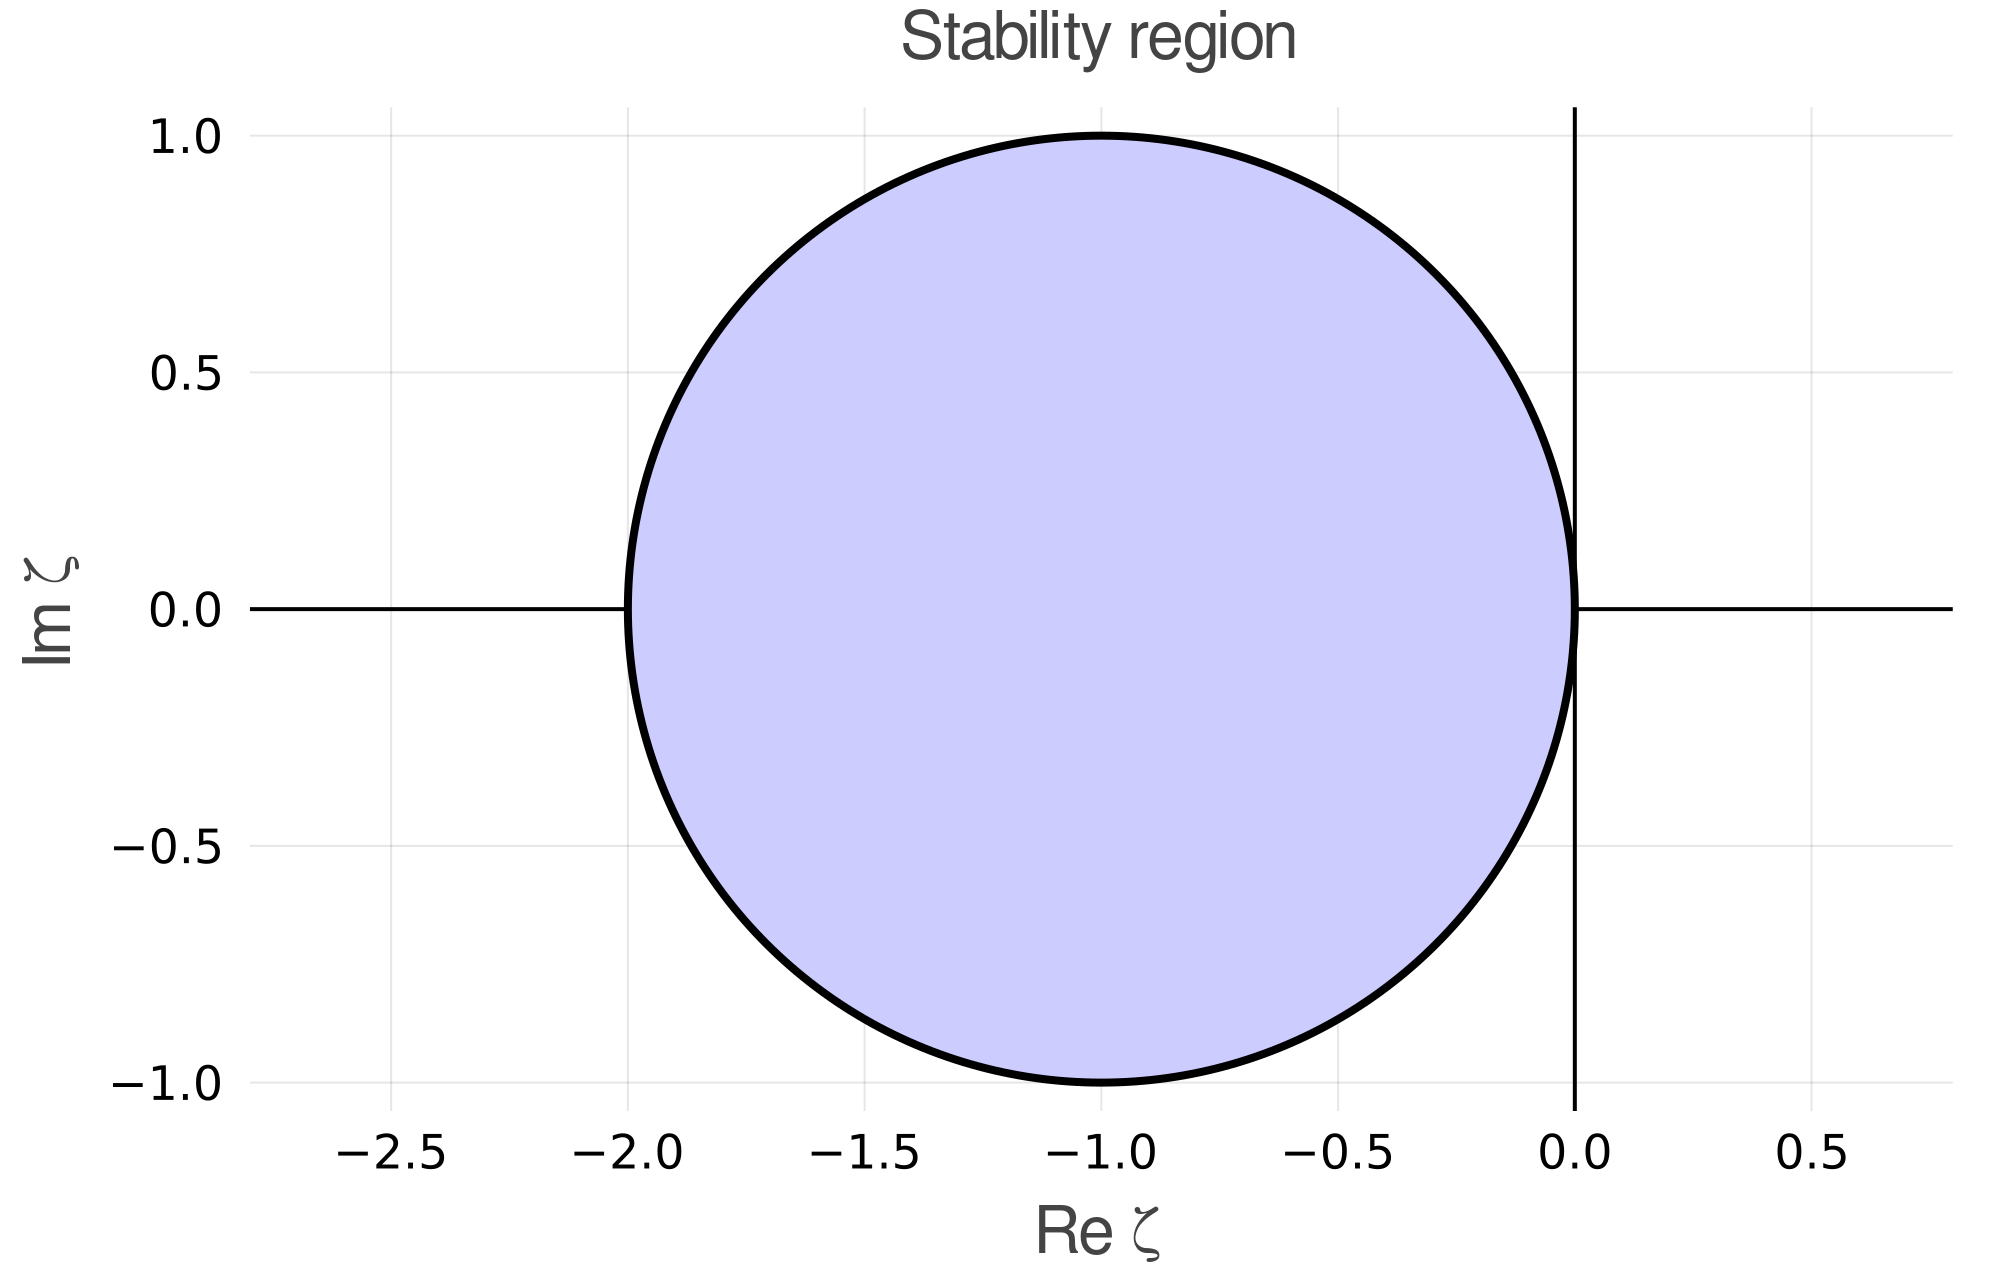

In [4]:
phi = 2π*(0:360)/360
z = @. exp(1im*phi) - 1;   # unit circle shifted to the left by 1

plot(Shape(real(z),imag(z)),color=RGB(.8,.8,1),
    xaxis=("Re ζ"), yaxis=("Im ζ"), aspect_ratio=1,
    title="Stability region",frame=:zerolines) 

In order to get inside this region, we have to find $\tau$ such that $\lambda \tau > -2$ for all eigenvalues $\lambda$. This is an _upper_ bound on $\tau$.

In [5]:
λ_min = minimum(λ)
@show max_τ = -2 / λ_min;

max_τ = -2 / λ_min = 0.0003125


Here we plot the resulting values of $\zeta=\lambda \tau$.

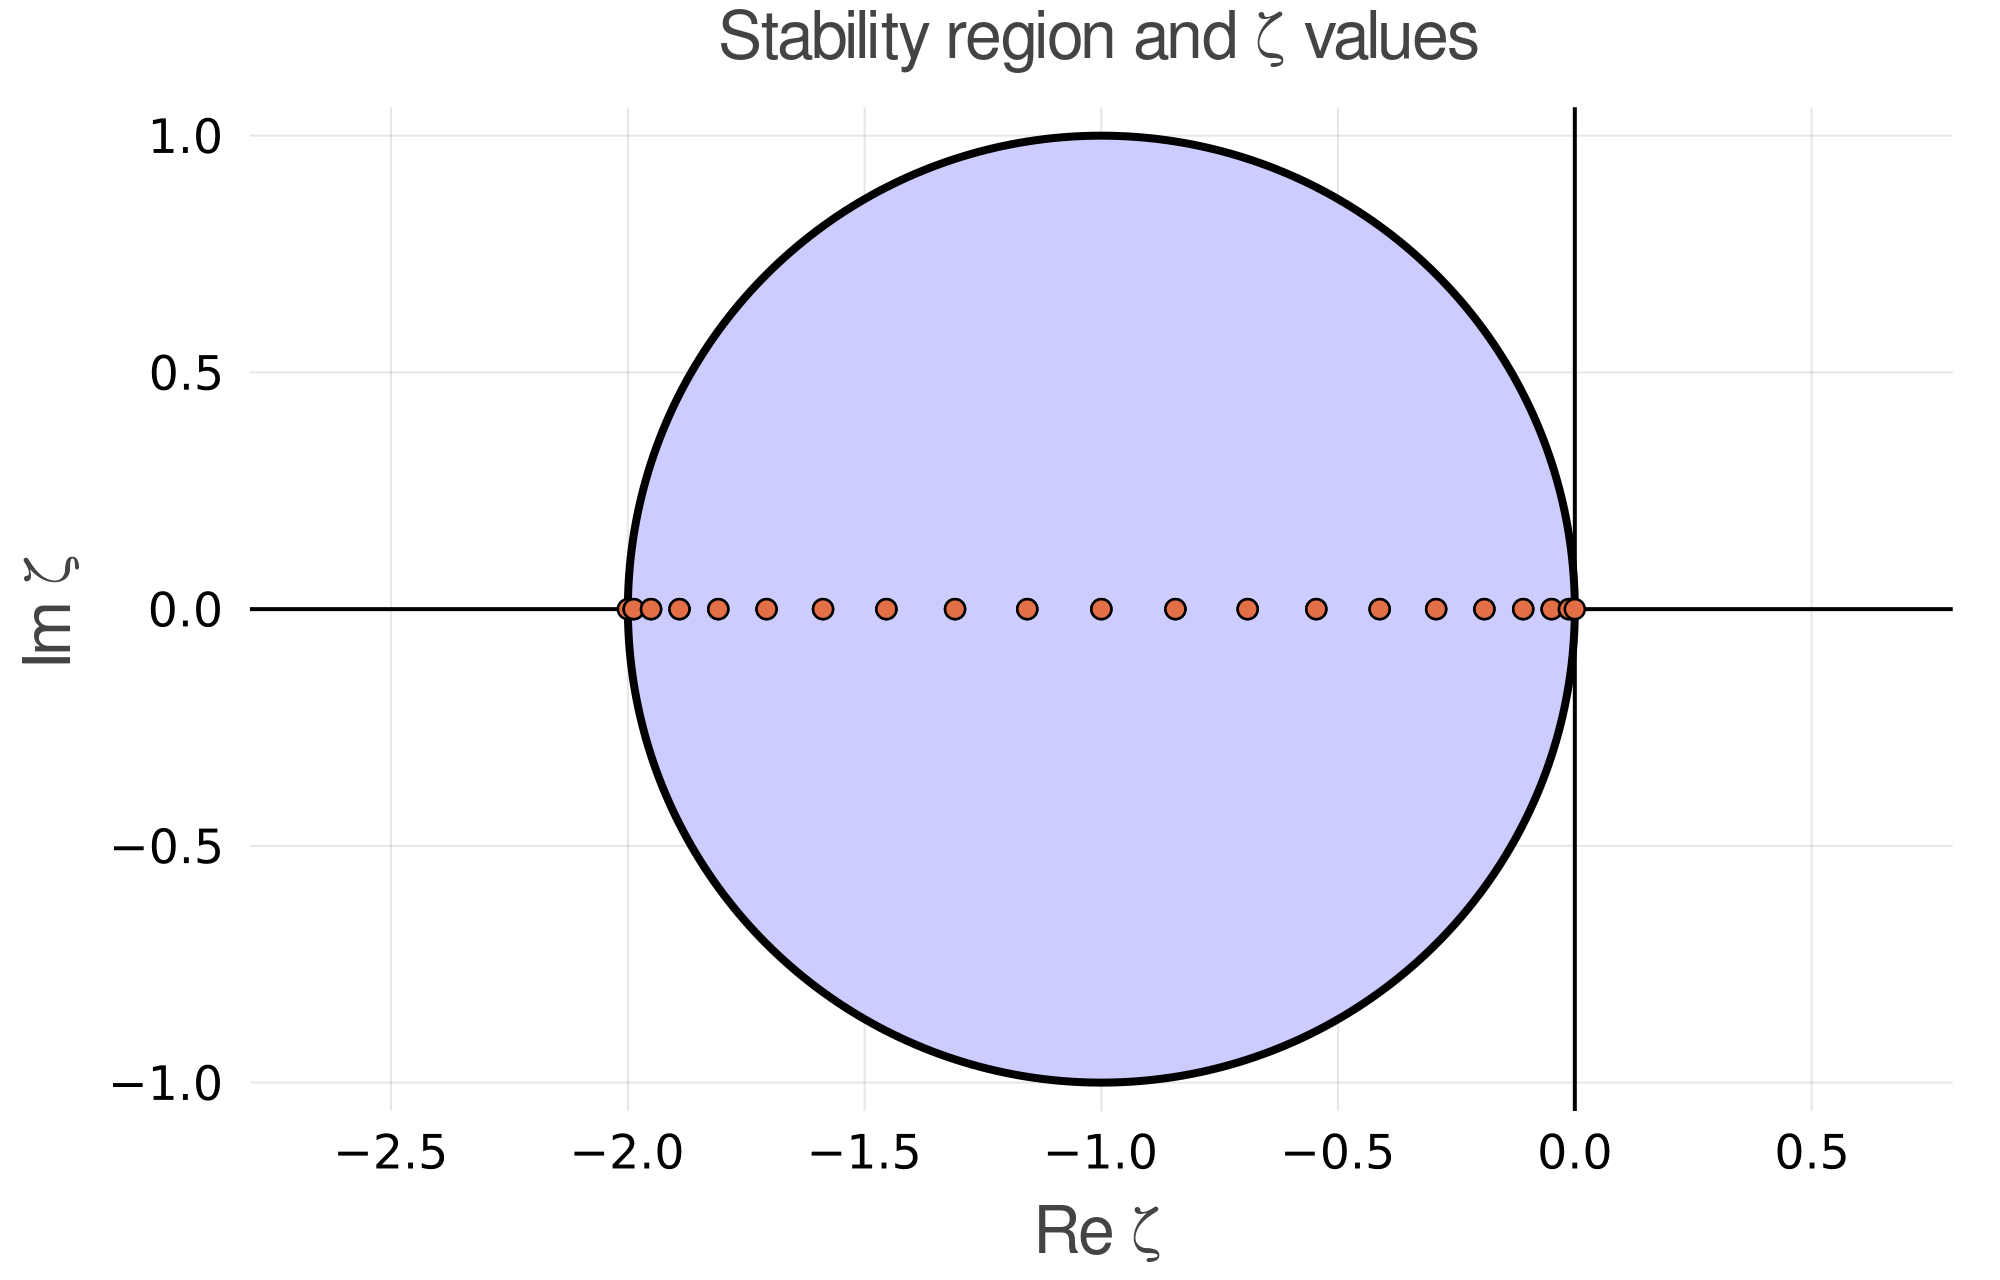

In [6]:
ζ = λ*max_τ
scatter!(real(ζ),imag(ζ),title="Stability region and ζ values")

In backward Euler, the region is $|\zeta-1|\ge 1$. Because they are all on the negative real axis, all of the $\zeta$ values will fit no matter what $\tau$ is chosen.

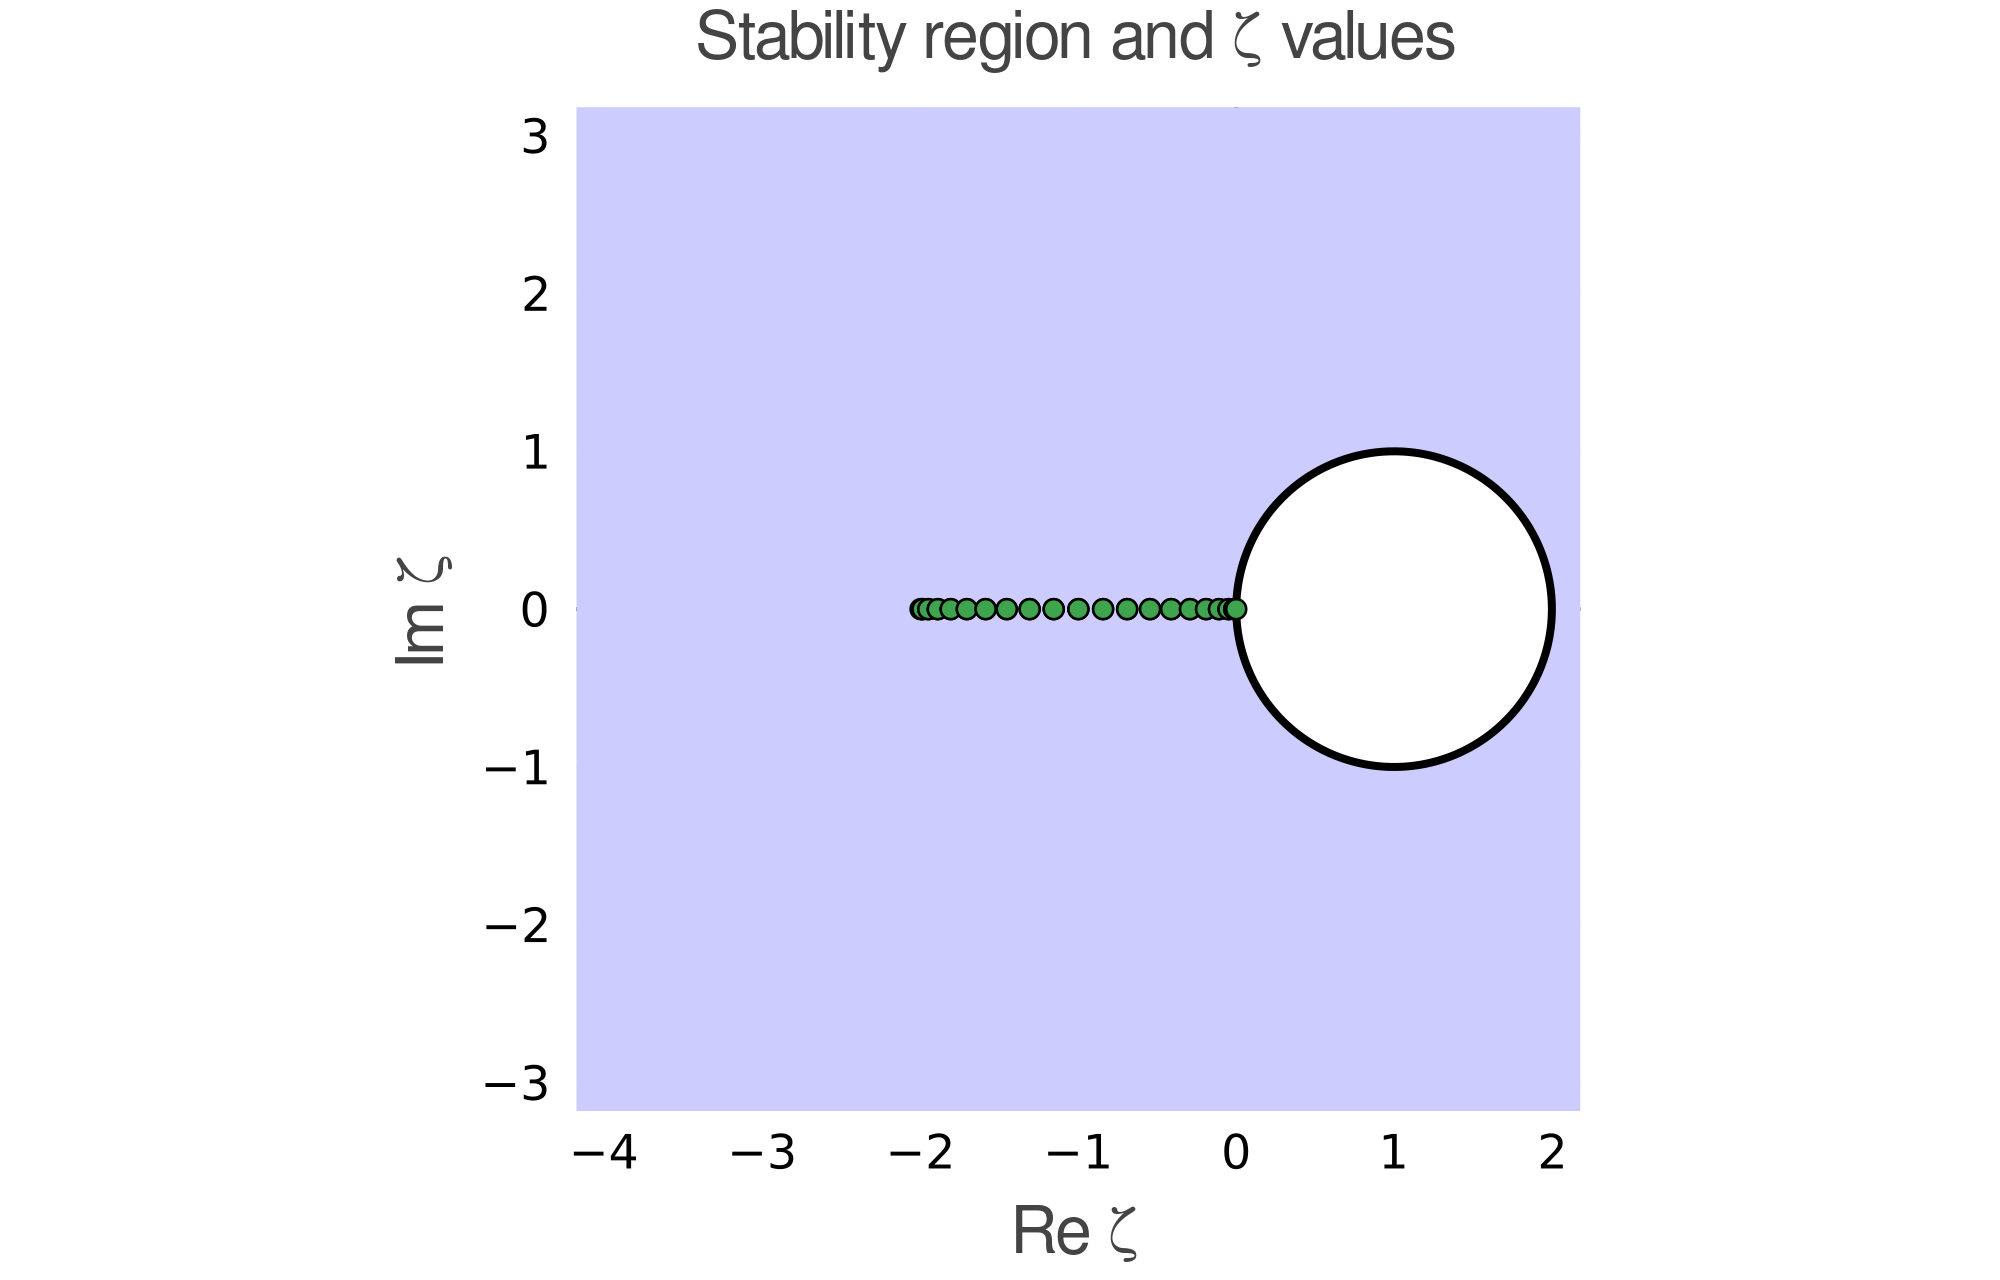

In [7]:
plot(Shape([-6,6,6,-6],[-6,-6,6,6]),color=RGB(.8,.8,1))

z = @. exp(1im*phi) + 1;   # unit circle shifted right by 1
plot!(Shape(real(z),imag(z)),color=:white)

scatter!(real(ζ),imag(ζ),
    xaxis=([-4,2],"Re ζ"),yaxis=([-3,3],"Im ζ"),aspect_ratio=1,
    title="Stability region and ζ values",frame=:zerolines)

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The matrix $\mathbf{D}_{xx}$ occurring in {eq}`heatMOL` for semidiscretization of the periodic heat equation has eigenvalues that can be found explicitly. Assuming that $x\in[0,1)$ (with periodic boundary conditions), for which $h=1/m$, then the eigenvalues are

:::{math}
:label: D2eigs
\lambda_j =  -4m^2 \sin^2 \frac{j\pi}{m}, \qquad j = 0,\ldots,m-1.   
:::

This result agrees with the observation in {numref}`Demo %s <demo-absstab-regions>` that the eigenvalues are real and negative. Furthermore, they lie within the interval $[-4m^2,0]$. In Euler time integration, this implies that $-4\tau m^2\ge -2$, or $\tau\ge 1/(2m^2)=O(m^{-2})$. For backward Euler, there is no time step restriction, and we say that backward Euler is unconditionally stable for this problem.

In summary, three things happen as $h\to 0$: 

1. The spatial discretization becomes more accurate like $O(h^2)$.
2. The size of the matrix increases like $O(h^{-1})$.
3. If we use an explicit time stepping method, then absolute stability requires $O(h^{-2})$ steps. 

The last restriction becomes rather burdensome as $h\to 0$, i. e., as we improve the spatial discretization, which is why implicit methods are preferred for diffusion. While any convergent IVP solver will get the right solution as $\tau\to 0$, the results are exponentially large nonsense until $\tau$ is small enough to satisfy absolute stability.
## Exercises

1. ✍ Use an eigenvalue decomposition to write the system
  
    $$
    \mathbf{u}'(t) =
    \begin{bmatrix}
      0 & 4 \\
      -4 & 0
    \end{bmatrix} \mathbf{u}(t)
    $$

    as an equivalent diagonal system. 

2. ✍ For each system, state whether its solutions are bounded as $t\to \infty$.
      
    **(a)** $\mathbf{u}'(t) =
    \displaystyle \begin{bmatrix}
      1 & 3 \\
      3 & 1
    \end{bmatrix} \mathbf{u}(t)$
    
    **(b)** $\mathbf{u}'(t) =
    \displaystyle \begin{bmatrix}
      -1 & 3 \\
      -3 & -1
    \end{bmatrix} \mathbf{u}(t)$
  
    **(c)** $\mathbf{u}'(t) =
    \displaystyle \begin{bmatrix}
      0 & 4 \\
      -4 & 0
    \end{bmatrix} \mathbf{u}(t)$

3. ✍ Using {numref}`figure-stabreg_ab_am` and {numref}`figure-stabreg_bd_rk`, estimate the time step restriction (if any) for the system
  
    $$
    \mathbf{u}'(t) =
    \begin{bmatrix}
      -4 & 0 & 0 \\
      0 & -2 & 0 \\
      0 & 0 & -0.5
    \end{bmatrix} \mathbf{u}(t)
    $$

    for the following IVP methods:
    
    **(a)** RK4 $\qquad$
    **(b)** AM4 $\qquad$
    **(c)** AB2

4. ✍ Using {numref}`figure-stabreg_ab_am` and {numref}`figure-stabreg_bd_rk`, find the time step restriction (if any) for the system
  
    $$
    \mathbf{u}'(t) =
    \begin{bmatrix}
      -1 & 0 & 0 \\
      0 & 0 & 4 \\
      0 & -4 & 0
    \end{bmatrix} \mathbf{u}(t)
    $$

    for the following IVP methods:
    
    **(a)** RK4 $\qquad$
    **(b)** AM4 $\qquad$
    **(c)** AB3

5. ✍ Of the following methods, which would be unsuitable for a problem having eigenvalues on the imaginary axis?  Justify your answer(s).
    
    **(a)** AM2 $\qquad$
    **(b)** AB2 $\qquad$
    **(c)** RK2 $\qquad$
    **(d)** RK3

6. ✍ Of the following methods, which would have a time step restriction for a problem with real, negative eigenvalues?  Justify your answer(s).

    **(a)** AM2 $\qquad$
    **(b)** AM4 $\qquad$
    **(c)** BD4 $\qquad$
    **(d)** RK4

    (problem-absstab-D2eigs)=
7. ✍ Let $\mathbf{D}_{xx}$ be $m\times m$ and given by {eq}`heatFD22`. For any integer $k \in \{0,\ldots,m-1\}$, define $\omega = \exp(2i k\pi/m)$ and $\mathbf{v} = \bigl[ 1,\; \omega,\; \omega^2,\; \ldots,\; \omega^{m-1} \bigr].$ Show that $\mathbf{v}$ is an eigenvector of $\mathbf{D}_{xx}$, with eigenvalue

    $$
    \lambda =  -4m^2 \sin^2 \left( \frac{k\pi}{m} \right).
    $$

    (This establishes that the eigenvalues all lie within the real interval $[-4m^2,0]$.)

8. ✍ **(a)** Derive an algebraic inequality equivalent to absolute stability for the AM2 (trapezoid) formula.
    
    ✍ **(b)** Argue that the inequality in part (a) is equivalent to the restriction $\operatorname{Re}(\zeta)\le 0$. (Hint: Complex magnitude is equivalent to distance in the plane.)